Gyro X


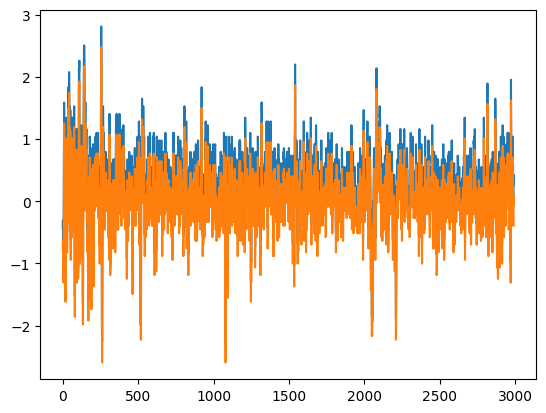

Gyro Y


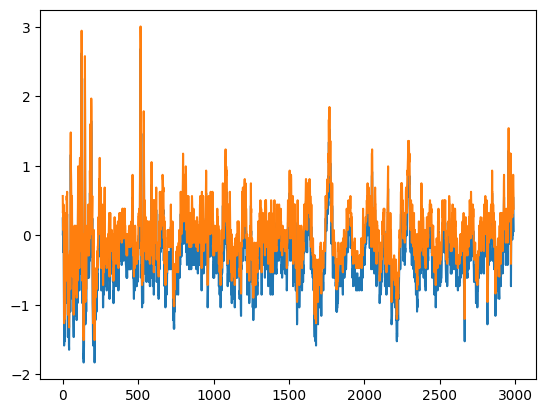

Gyro Z


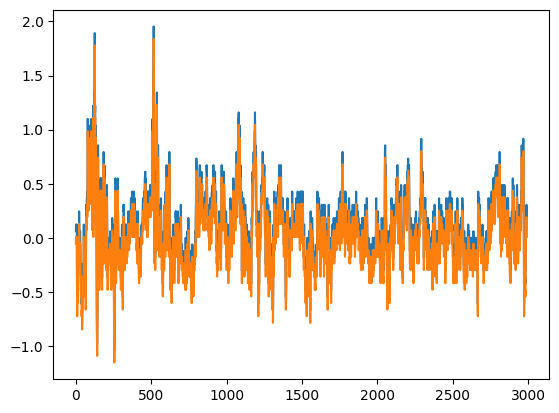

In [ ]:
# Calibration testing

import numpy as np
import os
import matplotlib.pyplot as plt

raw_data = np.genfromtxt('REST_right_leg_imu_data.csv', delimiter=',')


linear_data = raw_data[1:, 1:4]
linear_data_mean = linear_data.mean(axis=0)
offset = linear_data_mean - np.round(linear_data_mean) # pronac gdje je 1 NIJE IDEALNO, ALI RADI ZA NAŠ SLUČAJ # TYPE??
linear_calibrated = linear_data - offset

gyro_data = raw_data[1:, 4:7]
gyro_data_mean = gyro_data.mean(axis=0) # TYPE???
gyro_calibrated = gyro_data - gyro_data_mean

magnet_data = raw_data[1:, 7:]

calibrated_lin_gyro = np.concatenate((linear_calibrated, gyro_calibrated), axis=1)

header = 'LinearX, LinearY, LinearZ, AngularX, AngularY, AngularZ'
np.savetxt('calibrated.csv', calibrated_lin_gyro, delimiter=',', header=header, comments='')

print("Gyro X")
plt.plot(gyro_data[:, 0].flatten())
plt.plot(gyro_calibrated[:, 0].flatten())
plt.show()

print("Gyro Y")
plt.plot(gyro_data[:, 1].flatten())
plt.plot(gyro_calibrated[:, 1].flatten())
plt.show()

print("Gyro Z")
plt.plot(gyro_data[:, 2].flatten())
plt.plot(gyro_calibrated[:, 2].flatten())
plt.show()